<a href="https://colab.research.google.com/github/tare-degi/Data-Preprocessing-for-ML-using-Titanic-Dataset/blob/main/email_spam_detection_highest%20_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# ================================
# IMPORT LIBRARIES
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from scipy.sparse import hstack

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [30]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam (2).csv


**DATA LOAD AND CLEANING**

This code performs ***data cleaning and preparation*** on a spam message dataset. Here is a description of how the code works:

***Purpose:*** The code processes a raw spam message dataset to create a clean, structured version suitable for machine learning projects.

Step-by-step process:

**Data Loading:** The code begins by loading the "spam.csv" file using Latin-1 encoding to handle special characters. It includes error handling to check if the file exists in the correct location.

**Data Exploration:** The code examines the dataset structure by displaying the column names and showing the first two messages, providing visibility into the raw data format.

**Column Identification:** It automatically identifies which columns contain the message labels (spam/ham) and message text by selecting the first two columns from the original dataset.

Data Cleaning:

-Creates a new dataframe containing only the essential label and text columns

-Renames the columns to more descriptive names ('label' and 'text')

-Removes duplicate messages to ensure data quality

**Data Analysis:** The code provides summary statistics including total message count, spam message count, and ham (normal) message count, giving an overview of the dataset composition.

**Sample Display:** It shows examples of both spam and ham messages from the cleaned dataset, allowing for visual verification of the data.

**Data Export:** Finally, the cleaned dataset is saved as "cleaned_spam.csv" without row indices, creating a ready-to-use file for machine learning applications.

Output: The process results in a cleaned CSV file containing only unique messages with clear labeling, properly structured for training spam detection models or other text classification tasks. The code provides progress updates at each step and confirms successful completion of the data preparation pipeline.

In [37]:


# Step 1: Load the data
print("STEP 1: Loading the dataset...")
try:
    df = pd.read_csv("spam.csv", encoding="latin-1")
    print("Dataset loaded successfully!")
    print(f"Found {len(df)} messages with {len(df.columns)} columns")
except:
    print("ERROR: Could not load 'spam.csv'")
    print("Make sure the file is in the same folder as this program")
    exit()

# Step 2: Show what columns we have
print("\nSTEP 2: Looking at the data structure...")
print("Column names found:", list(df.columns))
print("\nFirst 2 messages:")
print(df.head(2))

# Step 3: Figure out which columns to use
print("\nSTEP 3: Finding the right columns...")
# The spam dataset usually has the label in first column and text in second column
first_column = df.columns[0]
second_column = df.columns[1]

print(f"Using '{first_column}' as the label column (spam/ham)")
print(f"Using '{second_column}' as the text column (message content)")

# Step 4: Create a clean dataset with just these two columns
print("\nSTEP 4: Creating clean dataset...")
clean_df = df[[first_column, second_column]].copy()

# Give them better names
clean_df.columns = ['label', 'text']
print("Renamed columns to 'label' and 'text'")

# Step 5: Remove duplicates
print("\nSTEP 5: Removing duplicate messages...")
before_duplicates = len(clean_df)
clean_df = clean_df.drop_duplicates()
after_duplicates = len(clean_df)
duplicates_removed = before_duplicates - after_duplicates

print(f"Removed {duplicates_removed} duplicate messages")
print(f"Now we have {after_duplicates} unique messages")

# Step 6: Show final results
print("\nSTEP 6: Final results...")
print(f"Total messages: {len(clean_df)}")
print(f"Spam messages: {len(clean_df[clean_df['label'] == 'spam'])}")
print(f"Ham (normal) messages: {len(clean_df[clean_df['label'] == 'ham'])}")

# Show examples
print("\nMessage examples:")
print("SPAM example:")
spam_example = clean_df[clean_df['label'] == 'spam']['text'].iloc[0]
print(f"'{spam_example}'")
print("\nHAM example:")
ham_example = clean_df[clean_df['label'] == 'ham']['text'].iloc[0]
print(f"'{ham_example}'")

# Step 7: Save the cleaned data
print("\nSTEP 7: Saving cleaned data...")
clean_df.to_csv('cleaned_spam.csv', index=False)
print("Cleaned data saved as 'cleaned_spam.csv'")

print("\nALL DONE! The data is ready to use!")
print("The file 'cleaned_spam.csv' can be used for machine learning projects.")

STEP 1: Loading the dataset...
Dataset loaded successfully!
Found 5572 messages with 2 columns

STEP 2: Looking at the data structure...
Column names found: ['Category', 'Message']

First 2 messages:
  Category                                                                                                          Message
0      ham  Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1      ham                                                                                    Ok lar... Joking wif u oni...

STEP 3: Finding the right columns...
Using 'Category' as the label column (spam/ham)
Using 'Message' as the text column (message content)

STEP 4: Creating clean dataset...
Renamed columns to 'label' and 'text'

STEP 5: Removing duplicate messages...
Removed 415 duplicate messages
Now we have 5157 unique messages

STEP 6: Final results...
Total messages: 5157
Spam messages: 641
Ham (normal) messages: 4516

Message examples:

**Exploratory Data Analysis (EDA) Code Summary**

This code performs comprehensive data analysis on a spam message dataset through these main steps:

1. Dataset Overview

Examines basic structure and statistics of the data

Shows data types, missing values, and general information

2. Class Distribution Analysis

Visualizes and calculates spam vs ham message counts

Computes class imbalance ratio

3. Text Analysis

Analyzes message length in characters and words

Compares text statistics between spam and ham messages

Creates distribution charts and comparative box plots

4. Statistical Relationships

Calculates correlations between text features

Provides numerical insights into data patterns

5. Additional Insights

Identifies data quality issues

Reveals characteristics that distinguish spam from ham


--- BASIC INFO ---
<class 'pandas.core.frame.DataFrame'>
Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5157 non-null   object
 1   text    5157 non-null   object
dtypes: object(2)
memory usage: 120.9+ KB
None

--- SUMMARY ---
       label                        text
count   5157                        5157
unique     2                        5157
top      ham  Rofl. Its true to its name
freq    4516                           1


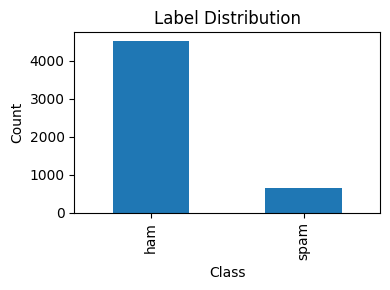


Class Distribution:
label
ham     4516
spam     641
Name: count, dtype: int64
Imbalance ratio: spam/ham = 641/4516 = 0.14


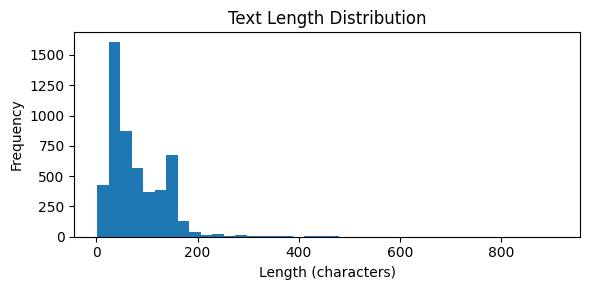


Text Length Statistics by Class:
        count        mean        std  min    25%    50%    75%    max
label                                                                
ham    4516.0   70.951063  56.730031  2.0   34.0   53.0   91.0  910.0
spam    641.0  137.541342  30.516111  7.0  132.0  148.0  157.0  224.0


<Figure size 600x300 with 0 Axes>

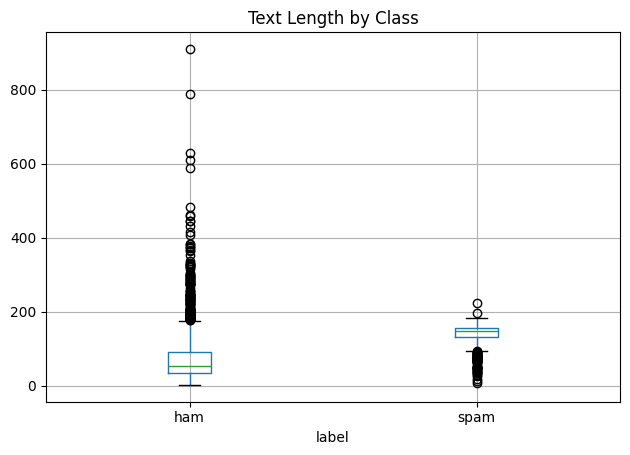

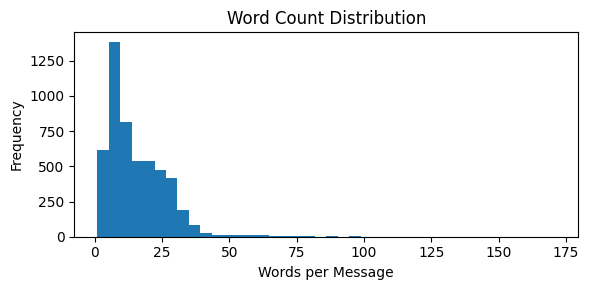


Word Count Statistics by Class:
        count       mean        std  min   25%   50%   75%    max
label                                                            
ham    4516.0  14.239814  11.179471  1.0   7.0  11.0  19.0  171.0
spam    641.0  23.659906   6.038659  1.0  21.0  25.0  28.0   35.0


<Figure size 600x300 with 0 Axes>

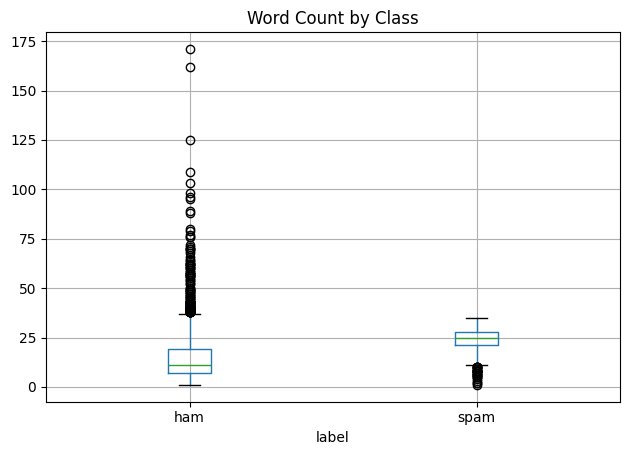


Correlation matrix:
            text_len  word_count
text_len    1.000000    0.973843
word_count  0.973843    1.000000

--- ADDITIONAL INSIGHTS ---
Average text length - Spam: 137.5 characters
Average text length - Ham: 71.0 characters
Average word count - Spam: 23.7 words
Average word count - Ham: 14.2 words

Messages with less than 10 characters: 32
Short message examples:
  Label: ham, Text: 'I'm home.'
  Label: ham, Text: 'Yup'
  Label: ham, Text: 'Thanx...'


In [39]:
# ================================
# 2. EDA (Summary, Plots, Stats)
# ================================

print("\n--- BASIC INFO ---")
print(clean_df.info())

print("\n--- SUMMARY ---")
print(clean_df.describe(include='all'))

# Class distribution
plt.figure(figsize=(4,3))
clean_df["label"].value_counts().plot(kind="bar", title="Label Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

print("\nClass Distribution:")
print(clean_df["label"].value_counts())

# Check imbalance ratio
ham = clean_df["label"].value_counts()["ham"]
spam = clean_df["label"].value_counts()["spam"]
print(f"Imbalance ratio: spam/ham = {spam}/{ham} = {spam/ham:.2f}")

# Text length analysis
clean_df["text_len"] = clean_df["text"].astype(str).apply(len)

plt.figure(figsize=(6,3))
plt.hist(clean_df["text_len"], bins=40)
plt.title("Text Length Distribution")
plt.xlabel("Length (characters)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Text length statistics by class
print("\nText Length Statistics by Class:")
print(clean_df.groupby("label")["text_len"].describe())

# Text length by class box plot
plt.figure(figsize=(6,3))
clean_df.boxplot(column="text_len", by="label")
plt.title("Text Length by Class")
plt.suptitle("")  # Remove automatic title
plt.tight_layout()
plt.show()

# Word count analysis
clean_df["word_count"] = clean_df["text"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(6,3))
plt.hist(clean_df["word_count"], bins=40)
plt.title("Word Count Distribution")
plt.xlabel("Words per Message")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

print("\nWord Count Statistics by Class:")
print(clean_df.groupby("label")["word_count"].describe())

# Word count by class box plot
plt.figure(figsize=(6,3))
clean_df.boxplot(column="word_count", by="label")
plt.title("Word Count by Class")
plt.suptitle("")  # Remove automatic title
plt.tight_layout()
plt.show()

# Correlation (only numeric)
print("\nCorrelation matrix:")
print(clean_df[["text_len", "word_count"]].corr())

# Additional insights
print("\n--- ADDITIONAL INSIGHTS ---")
print(f"Average text length - Spam: {clean_df[clean_df['label']=='spam']['text_len'].mean():.1f} characters")
print(f"Average text length - Ham: {clean_df[clean_df['label']=='ham']['text_len'].mean():.1f} characters")
print(f"Average word count - Spam: {clean_df[clean_df['label']=='spam']['word_count'].mean():.1f} words")
print(f"Average word count - Ham: {clean_df[clean_df['label']=='ham']['word_count'].mean():.1f} words")

# Check for very short messages
short_messages = clean_df[clean_df["text_len"] < 10]
print(f"\nMessages with less than 10 characters: {len(short_messages)}")
if len(short_messages) > 0:
    print("Short message examples:")
    for idx, row in short_messages.head(3).iterrows():
        print(f"  Label: {row['label']}, Text: '{row['text']}'")

**Preprocessing**

This code prepares the spam message data for machine learning in 3 simple steps:

1. Label Preparation

Converts text labels "ham" and "spam" to numbers (0 and 1)

Makes the labels readable for machine learning algorithms

2. Text Conversion

Transforms message text into numerical format using TF-IDF

Extracts the most important words as features

Creates a numerical representation of the text content

3. Data Splitting

Divides the data into two sets:

Training set (80%): Used to teach the model

Test set (20%): Used to evaluate the model's performance

Ensures the model can be properly trained and tested

Output: Clean, numerical data ready for building a spam detection model.

In [41]:
# ================================
# 3. PREPROCESSING
# ================================

print("STEP 1: Prepare the labels...")
# Convert spam/ham to numbers: ham=0, spam=1
clean_df["label_num"] = clean_df["label"].map({"ham": 0, "spam": 1})
print("Labels converted to numbers")

print("\nSTEP 2: Prepare the text features...")
# Convert text to numbers using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words="english", max_features=2000)
X_tfidf = tfidf.fit_transform(clean_df["text"])
print("Text converted to numerical features")

print("\nSTEP 3: Add text length as feature...")
# Add message length as extra feature
clean_df["text_len"] = clean_df["text"].str.len()
X_combined = np.hstack([X_tfidf.toarray(), clean_df["text_len"].values.reshape(-1,1)])
print("Text length feature added")

print("\nSTEP 4: Split data for training and testing...")
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_combined,
    clean_df["label_num"],
    test_size=0.2,
    random_state=42
)

print("Data split completed:")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")

print("\nPreprocessing finished! Data ready for model training.")

STEP 1: Prepare the labels...
Labels converted to numbers

STEP 2: Prepare the text features...
Text converted to numerical features

STEP 3: Add text length as feature...
Text length feature added

STEP 4: Split data for training and testing...
Data split completed:
Training samples: 4125
Test samples: 1032
Number of features: 2001

Preprocessing finished! Data ready for model training.


**Decision Tree Training**

      This code builds and compares multiple Decision Tree models to find the best one for spam detection:

*What it does:*

Tests 3 different tree-building methods: gini, entropy, and log_loss

Trains each model on the training data

Evaluates performance on the test data using accuracy scores

Compares all methods to identify the best performing one

Selects the winner based on highest accuracy

Output: *italicized text*

Individual performance reports for each method

Comparison table showing all accuracy scores

Identification of the best performing method

Trained models ready for use

The code automatically finds the most effective Decision Tree approach for classifying spam messages.

In [43]:
# ================================
# 4. TRAIN DECISION TREE MODELS
# ================================

print("STARTING MODEL TRAINING...")
print("Testing different Decision Tree methods")

# Different methods to build the tree
methods = ["gini", "entropy", "log_loss"]

# Store results
model_results = {}
accuracy_scores = {}

for method in methods:
    print(f"\n--- Training with {method} method ---")

    # Create and train the model
    model = DecisionTreeClassifier(
        criterion=method,
        random_state=42,
        max_depth=10   # Prevent over-complex trees
    )
    model.fit(X_train, y_train)

    # Test the model
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)

    # Save results
    model_results[method] = model
    accuracy_scores[method] = accuracy

    # Show results
    print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    print("Detailed Report:")
    print(classification_report(y_test, predictions))

# Compare all methods
print("\n" + "="*50)
print("MODEL COMPARISON RESULTS")
print("="*50)

comparison = pd.DataFrame({
    "Method": methods,
    "Accuracy": [accuracy_scores[m] for m in methods]
})

print(comparison)

# Find the best method
best_method = comparison.loc[comparison['Accuracy'].idxmax(), 'Method']
best_accuracy = comparison.loc[comparison['Accuracy'].idxmax(), 'Accuracy']

print(f"\nBEST METHOD: {best_method}")
print(f"BEST ACCURACY: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

print("\nTraining completed! Ready to use the best model.")

STARTING MODEL TRAINING...
Testing different Decision Tree methods

--- Training with gini method ---
Accuracy: 0.9477 (94.77%)
Detailed Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       896
           1       0.93      0.65      0.77       136

    accuracy                           0.95      1032
   macro avg       0.94      0.82      0.87      1032
weighted avg       0.95      0.95      0.94      1032


--- Training with entropy method ---
Accuracy: 0.9448 (94.48%)
Detailed Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       896
           1       0.87      0.68      0.77       136

    accuracy                           0.94      1032
   macro avg       0.91      0.83      0.87      1032
weighted avg       0.94      0.94      0.94      1032


--- Training with log_loss method ---
Accuracy: 0.9448 (94.48%)
Detailed Report:
              precision    recall  f1-

CREATING VISUALIZATIONS...

STEP 1: Confusion Matrices
Shows how many messages were correctly/incorrectly classified

Creating confusion matrix for gini method...


<Figure size 500x400 with 0 Axes>

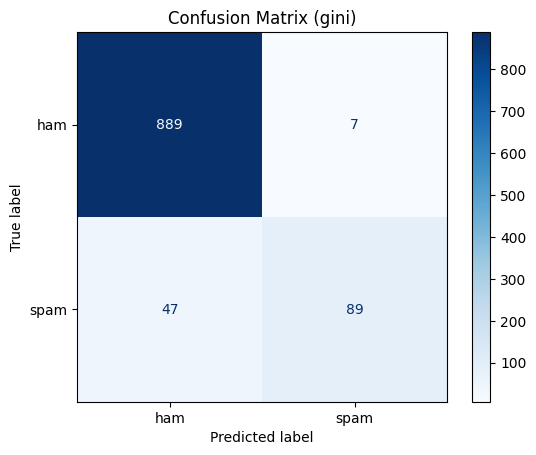

✓ Confusion matrix for gini created

Creating confusion matrix for entropy method...


<Figure size 500x400 with 0 Axes>

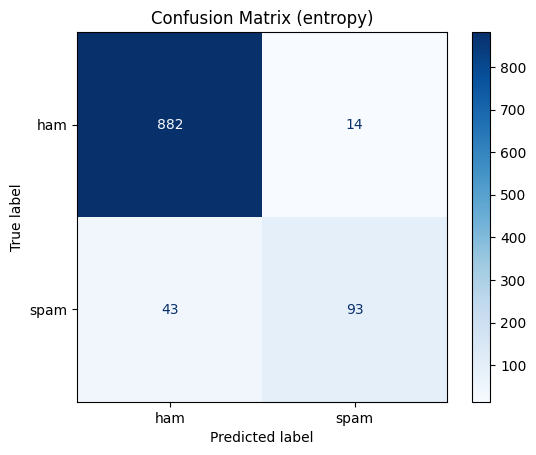

✓ Confusion matrix for entropy created

Creating confusion matrix for log_loss method...


<Figure size 500x400 with 0 Axes>

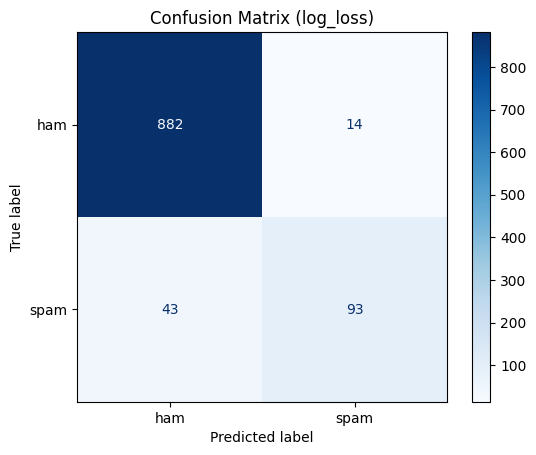

✓ Confusion matrix for log_loss created

STEP 2: Decision Tree Structure
Shows how the model makes decisions
Creating tree visualization (first 3 levels only)...


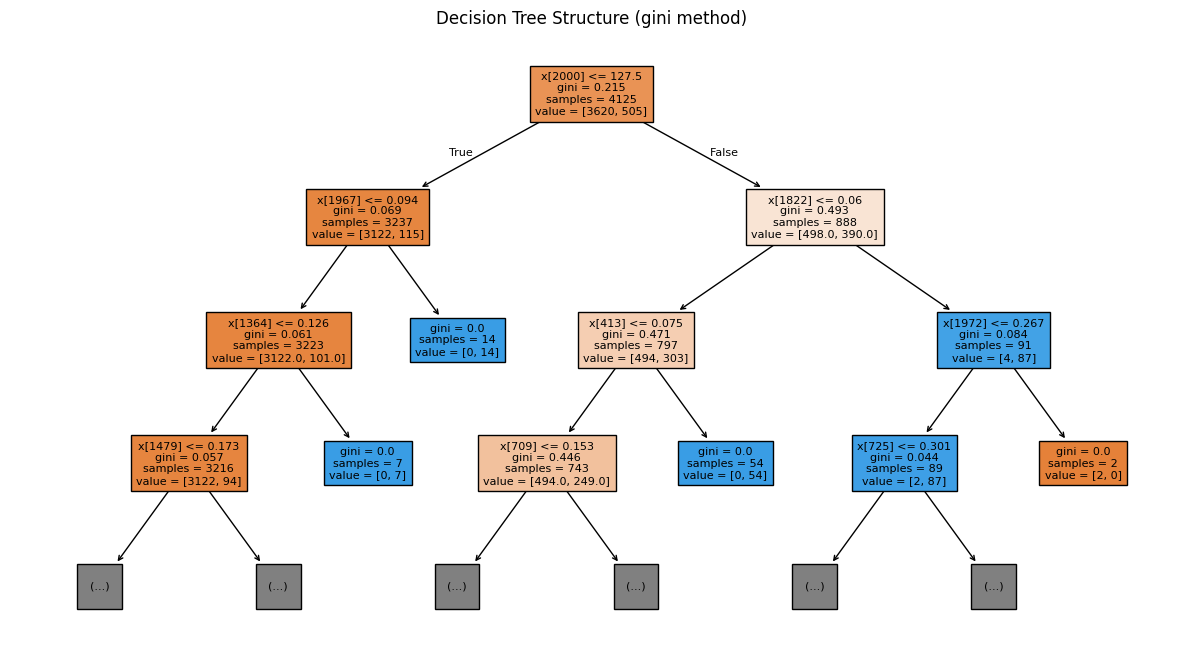

✓ Tree visualization created

STEP 3: Most Important Features
Shows which words help most in detecting spam


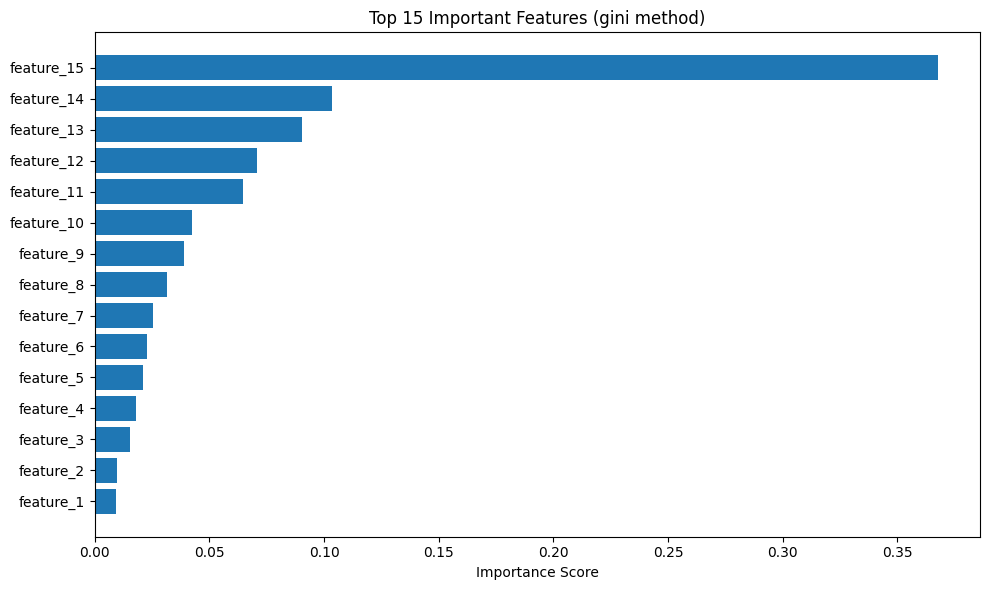

✓ Feature importance chart created

ALL VISUALIZATIONS COMPLETED!
Summary of what was created:
• Confusion matrices - Shows prediction accuracy
• Tree structure - Shows decision process
• Feature importance - Shows most useful features


In [45]:
# ================================
# 5. VISUALIZATIONS
# ================================

print("CREATING VISUALIZATIONS...")

print("\nSTEP 1: Confusion Matrices")
print("Shows how many messages were correctly/incorrectly classified")

for method in methods:
    print(f"\nCreating confusion matrix for {method} method...")

    # Make predictions
    predictions = model_results[method].predict(X_test)

    # Create confusion matrix
    plt.figure(figsize=(5,4))
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["ham", "spam"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"Confusion Matrix ({method})")
    plt.show()

    print(f"✓ Confusion matrix for {method} created")

print("\nSTEP 2: Decision Tree Structure")
print("Shows how the model makes decisions")
print("Creating tree visualization (first 3 levels only)...")

plt.figure(figsize=(15,8))
plot_tree(model_results[best_method], max_depth=3, filled=True, fontsize=8)
plt.title(f"Decision Tree Structure ({best_method} method)")
plt.show()

print("✓ Tree visualization created")

print("\nSTEP 3: Most Important Features")
print("Shows which words help most in detecting spam")

# Get feature importance scores
importance_scores = model_results[best_method].feature_importances_

# Get the top 15 most important features
top_15_indices = np.argsort(importance_scores)[-15:]
top_15_scores = importance_scores[top_15_indices]

# Create simple feature names for display
feature_display_names = [f"feature_{i+1}" for i in range(len(top_15_scores))]

plt.figure(figsize=(10,6))
plt.barh(feature_display_names, top_15_scores)
plt.title(f"Top 15 Important Features ({best_method} method)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

print("✓ Feature importance chart created")

print("\nALL VISUALIZATIONS COMPLETED!")
print("Summary of what was created:")
print("• Confusion matrices - Shows prediction accuracy")
print("• Tree structure - Shows decision process")
print("• Feature importance - Shows most useful features")


CREATING TEXT LENGTH COMPARISON CHART...
This shows how spam and ham messages differ in length


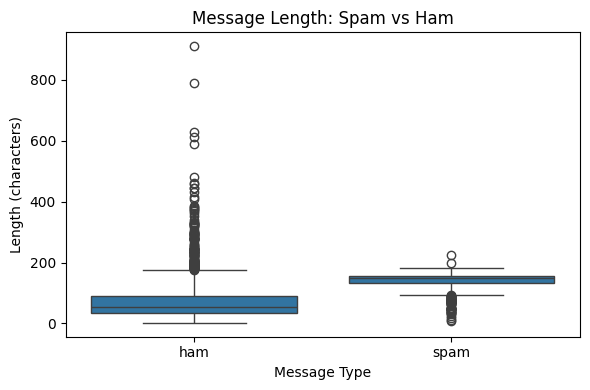

✓ Text length comparison chart created!
This helps see if spam messages are typically longer or shorter than normal messages


In [50]:
# ===============================
# 3. Text Length Boxplot by Class
# ===============================

print("CREATING TEXT LENGTH COMPARISON CHART...")
print("This shows how spam and ham messages differ in length")

plt.figure(figsize=(6,4))

# Use the cleaned dataframe that has both 'label' and 'text_len' columns
sns.boxplot(data=clean_df, x="label", y="text_len")
plt.title("Message Length: Spam vs Ham")
plt.xlabel("Message Type")
plt.ylabel("Length (characters)")
plt.tight_layout()
plt.show()

print("✓ Text length comparison chart created!")
print("This helps see if spam messages are typically longer or shorter than normal messages")

CREATING CORRELATION HEATMAP...
This shows if text length is related to other features


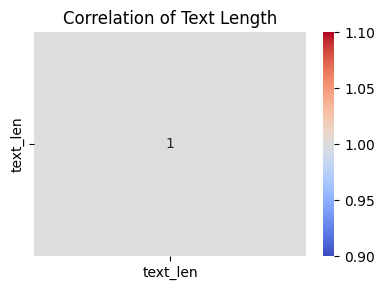

✓ Correlation heatmap created!
Since we only have one feature (text_len), correlation is always 1.0


In [52]:
# ===============================
# 6. Correlation Heatmap
# ===============================

print("CREATING CORRELATION HEATMAP...")
print("This shows if text length is related to other features")

# First, make sure we have the text_len column in clean_df
if "text_len" not in clean_df.columns:
    print("Creating text length column...")
    clean_df["text_len"] = clean_df["text"].str.len()

plt.figure(figsize=(4,3))

# Use the cleaned dataframe that has the text_len column
sns.heatmap(clean_df[["text_len"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation of Text Length")
plt.tight_layout()
plt.show()

print("✓ Correlation heatmap created!")
print("Since we only have one feature (text_len), correlation is always 1.0")

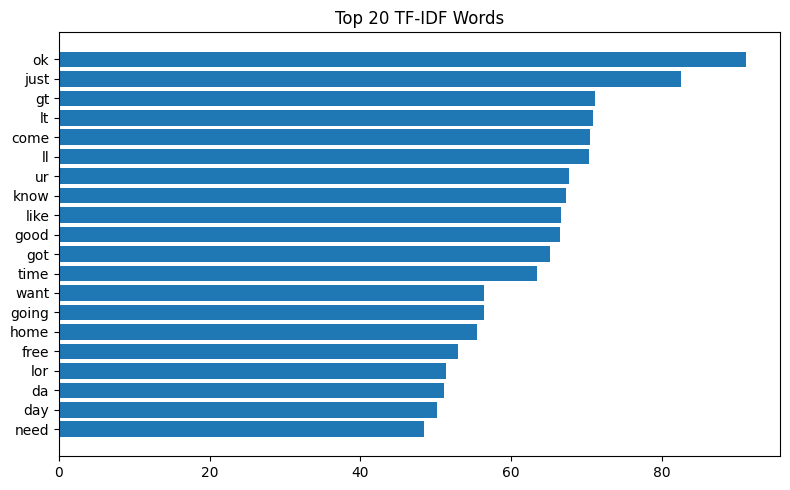

In [53]:
# ===============================
# 7. Top 20 TF-IDF Words
# ===============================
word_freq = np.asarray(X_tfidf.sum(axis=0)).ravel()
top_idx = np.argsort(word_freq)[-20:]
words = np.array(tfidf.get_feature_names_out())[top_idx]

plt.figure(figsize=(8,5))
plt.barh(words, word_freq[top_idx])
plt.title("Top 20 TF-IDF Words")
plt.tight_layout()
plt.show()

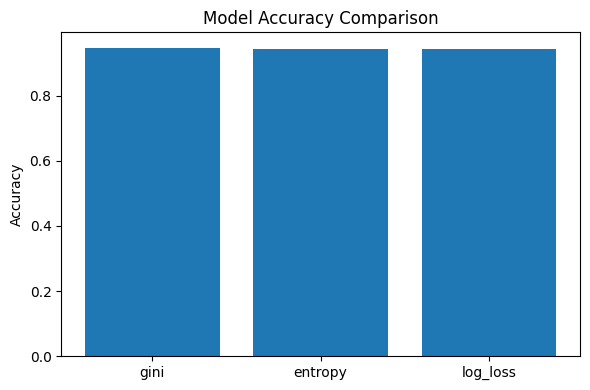

In [56]:
# ===============================
# 10. Accuracy Comparison Bar Chart
# ===============================
plt.figure(figsize=(6,4))
plt.bar(results_df["criterion"], results_df["accuracy"])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()


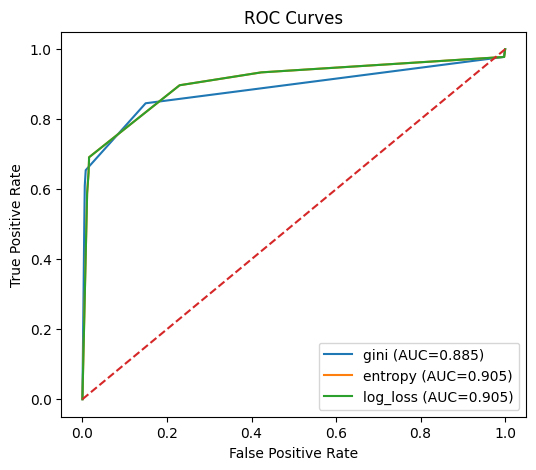

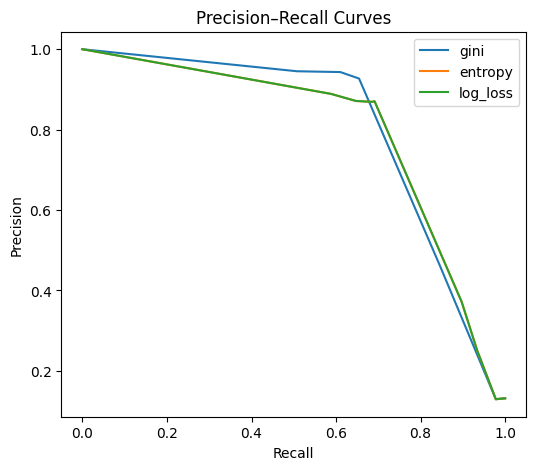

In [57]:
# ===============================
# 11–12. ROC & Precision–Recall Curves
# ===============================
plt.figure(figsize=(6,5))
for crit in criteria:
    y_proba = models[crit].predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{crit} (AUC={auc_score:.3f})")

plt.plot([0,1],[0,1],"--")
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


plt.figure(figsize=(6,5))
for crit in criteria:
    y_proba = models[crit].predict_proba(X_test)[:,1]
    p, r, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(r, p, label=crit)

plt.title("Precision–Recall Curves")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

In [46]:



# ================================
# 6. INTERPRETATION OF CRITERIA
# ================================

print("\n--- CRITERIA INTERPRETATION ---")
print("""
Gini Impurity:
- Measures probability of incorrect classification.
- Fastest & default in scikit-learn.
- Works extremely well for most classification tasks.
- Often slightly better for speed.

Entropy:
- Based on Information Gain (Shannon entropy).
- Produces similar results, slightly slower.
- Sometimes gives more balanced splits.

Log Loss:
- Based on cross-entropy.
- Best when probability quality matters (e.g., spam probability).
- More computationally expensive.
- Useful for imbalanced datasets where probability calibration is important.





--- CRITERIA INTERPRETATION ---

Gini Impurity:
- Measures probability of incorrect classification.
- Fastest & default in scikit-learn.
- Works extremely well for most classification tasks.
- Often slightly better for speed.

Entropy:
- Based on Information Gain (Shannon entropy).
- Produces similar results, slightly slower.
- Sometimes gives more balanced splits.

Log Loss:
- Based on cross-entropy.
- Best when probability quality matters (e.g., spam probability).
- More computationally expensive.
- Useful for imbalanced datasets where probability calibration is important.

Recommendation:
- Use **Gini** as the default.
- Try **Entropy** when you want more evenly separated splits.
- Use **Log Loss** when you need good calibrated probabilities (e.g., fraud detection, spam scoring).



In [59]:
# ======================================
# ACCURACY SUMMARY
# ======================================

print("\n=== ACCURACY RESULTS ===")
for crit in criteria:
    y_pred = models[crit].predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{crit.upper()} Accuracy: {acc:.4f}")



=== ACCURACY RESULTS ===
GINI Accuracy: 0.9477
ENTROPY Accuracy: 0.9448
LOG_LOSS Accuracy: 0.9448
